                    ZOMATO RESTAURANT's EXPLORATORY DATA ANALYSIS                                               

                        Importing the Dataset into Dataframe                        

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
zd=pd.read_csv('zomato.csv',encoding='Utf-8')

In [6]:
zd.shape

(51717, 17)

In [7]:
zd.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [8]:
zd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

                        Data Preprocessing and Data Cleaning                            

In [9]:
# In our dataset we have plenty of columns which will not be used by us for EDA .
# So we remove the unccessary data from our dataframe.
unnec_col=['url','address','phone','reviews_list','menu_item','listed_in(city)','dish_liked','cuisines']
zd.drop(columns=unnec_col,inplace=True)


In [10]:
# Removing the Duplicate values.

zd.duplicated().sum()           # finding the count of duplicate values.
zd.drop_duplicates(inplace=True)        # Removing the duplicate values.

In [ ]:
# Now we correct the rate column by converting rate value from 3.5/5 to 3.5.

zd['rate']=zd['rate'].str.split('/').str[0].str.strip()
zd['rate']=pd.to_numeric(zd['rate'],errors='coerce')


KeyError: 'rate'

In [12]:
# Now we convert our categorical data columns into 1/0 for better EDA.
zd['online_order']=zd['online_order'].map({'Yes':1,'No':0})
zd['book_table']=zd['book_table'].map({'Yes':1,'No':0})

In [13]:
# converting cost into float data type.
zd['approx_cost(for two people)']=pd.to_numeric(zd['approx_cost(for two people)'],errors='coerce')

Handling Missing values

In [77]:
# checking is their any null values or not.
pd.isnull(zd).sum()

Name                     0
Online_order_avl         0
Table_booking_avl        0
Rating                3659
Votes                    0
Location                 0
Restaurant_type          0
Cost                     0
listed_in                0
rating_cn            34898
dtype: int64

In [ ]:
# filling the missing values.
zd['rate']=zd.groupby('name')['rate'].transform(lambda x:x.ffill().bfill())
zd['location']=zd.groupby('name')['location'].transform(lambda x:x.ffill().bfill())
zd['rest_type']=zd.groupby('name')['rest_type'].transform(lambda x:x.ffill().bfill())
zd['approx_cost(for two people)']=zd.groupby('name')['approx_cost(for two people)'].transform(lambda x:x.ffill().bfill())


C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_9148\817012445.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  zd['Cost']=zd.groupby('Name')['Cost'].transform(lambda x:x.ffill().bfill())


In [16]:
# after filling he missing values we have very few values are left which are missng so me make them 0.
zd['rate'].fillna('Not Available',inplace=True)
zd['approx_cost(for two people)'].fillna('Not Available',inplace=True)
zd['location'].fillna('Not Available',inplace=True)
zd['rest_type'].fillna('Not Available',inplace=True)


C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_9148\3674489453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zd['rate'].fillna('Not Available',inplace=True)
C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_9148\3674489453.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  zd['rate'].fillna('Not Available',inplace=True)
C:\User

Now we change the names of our columns in a refined form.

In [37]:
zd.reset_index(drop = True, inplace = True)

zd.rename(columns = {'name' : 'Name',
                     'online_order' : 'Online_order_avl',
                     'book_table' : 'Table_booking_avl',
                     'rate' : 'Rating',
                     'votes' : 'Votes',
                     'location' : 'Location',
                     'rest_type' : 'Restaurant_type',
                     'approx_cost(for two people)' : 'Cost',
                     'listed_in(type)' : 'listed_in'
                     }, inplace = True)

In [38]:
zd.head()

,Name,Online_order_avl,Table_booking_avl,Rating,Votes,Location,Restaurant_type,Cost,listed_in
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,800.0,Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,800.0,Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining",800.0,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,300.0,Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet


                                                               VISUALIZATION                                                                                           

                        Count of Orders on Different Restaurant Types .                             

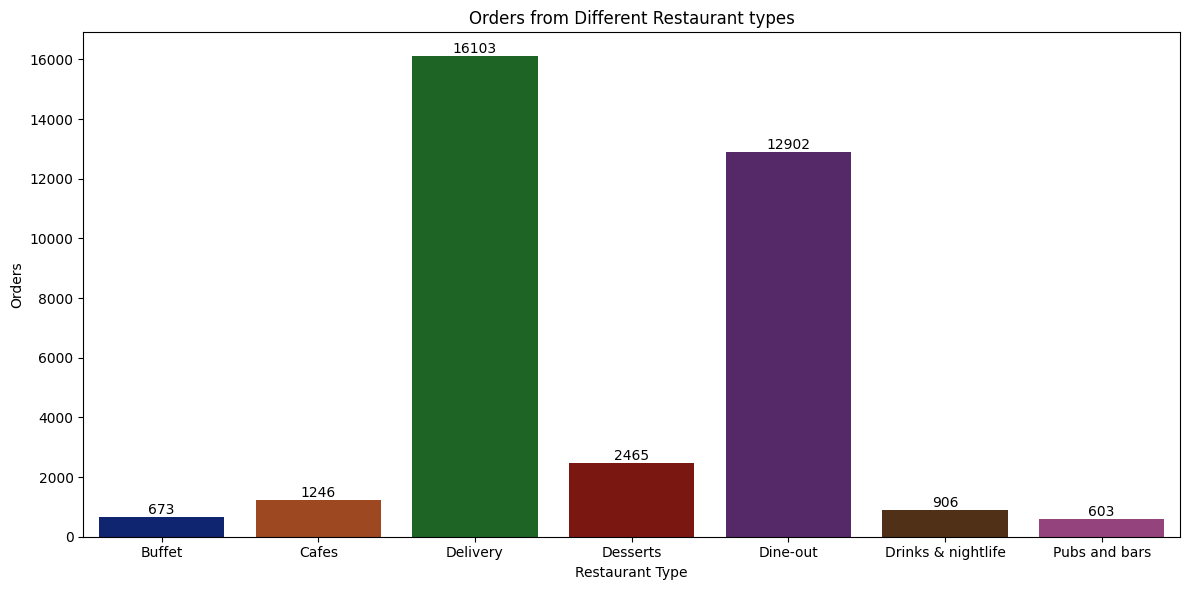

In [39]:
plt.figure(figsize=(12,6))
rest_type=sns.countplot(data=zd,x='listed_in',hue='listed_in',palette='dark',legend=False)
for container in rest_type.containers:
    rest_type.bar_label(container,label_type='edge')

plt.title("Orders from Different Restaurant types")
plt.xlabel("Restaurant Type")
plt.ylabel("Orders")
plt.tight_layout()
plt.show()


From above chart we can conclude that the most orders are from the Delivery type Restaurants.

                    Now we will Find the rating of Different Restaurant Types.                      

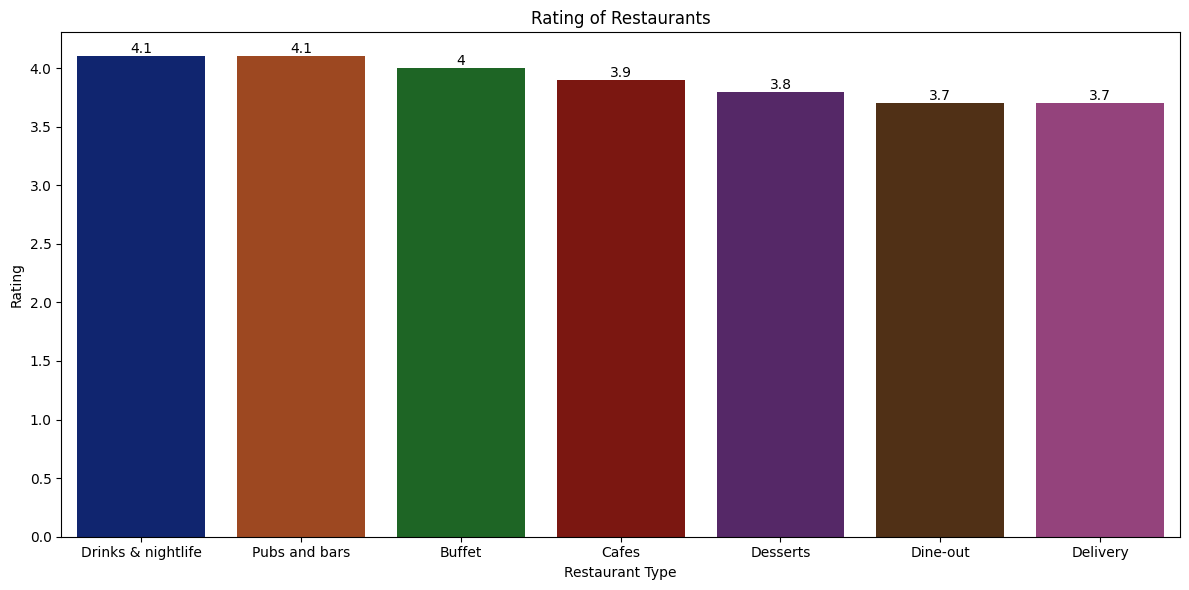

In [68]:

avg_rating=zd.groupby(zd.listed_in)['Rating'].mean().sort_values(ascending=False).round(1)       #finding the avaerage rating of restaurants.

plt.figure(figsize=(12,6))
rst_rating=sns.barplot(x=avg_rating.index,y=avg_rating.values,hue= avg_rating.index,palette='dark',legend=False)

for container in rst_rating.containers:
    rst_rating.bar_label(container,label_type='edge')

plt.title("Rating of Restaurants")
plt.xlabel('Restaurant Type')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()



We can see that the most rated Restaurant is Drink & nightlife and Pubs and bars Type Restaurants.

           Now, we aim to identify the most visited or most frequently ordered restaurants, evaluated based on their cost for two.                      

    In this context, we consider "Votes" as a proxy for customer engagement — representing the number of orders or visits a restaurant has received.       

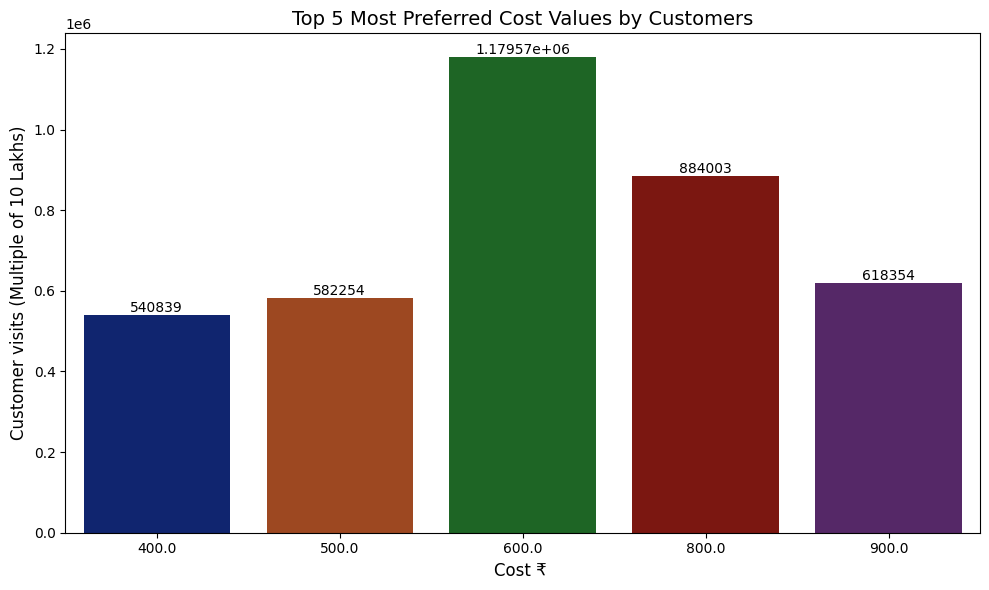

In [95]:


# Group by 'Cost' and sum the votes
cost_votes = zd.groupby('Cost')['Votes'].sum().sort_values(ascending=False)

# Get top 5 cost categories with highest total votes
top5_cost = cost_votes.head(5)

plt.figure(figsize=(10,6))
cst=sns.barplot(x=top5_cost.index, y=top5_cost.values, hue=top5_cost.index,palette='dark',legend=False)

plt.xlabel("Cost ₹ ", fontsize=12)
plt.ylabel("Customer visits (Multiple of 10 Lakhs)", fontsize=12)
plt.title("Top 5 Most Preferred Cost Values by Customers", fontsize=14)

for container in cst.containers:
    cst.bar_label(container,label_type='edge')

plt.tight_layout()
plt.show()


From above chart we can conclude that the most preferable cost by customer's is 600

            Now we find the Percentage of Total orders didvided in Online and Offline Orders                                                                

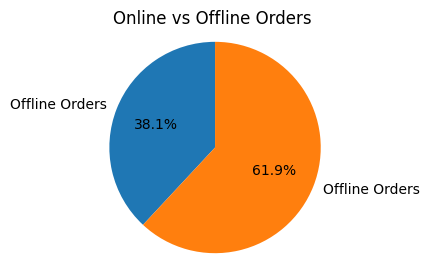

In [106]:
order_data = zd.groupby('Online_order_avl')['Votes'].sum()

labels = ['Online Orders' if i == 'Yes' else 'Offline Orders' for i in order_data.index]
sizes = order_data.values


plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Online vs Offline Orders ")
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.show()


We conclude that the most orders are online 

Now we will find the top 5 restaurant name who hav ethe most visited customers or orders

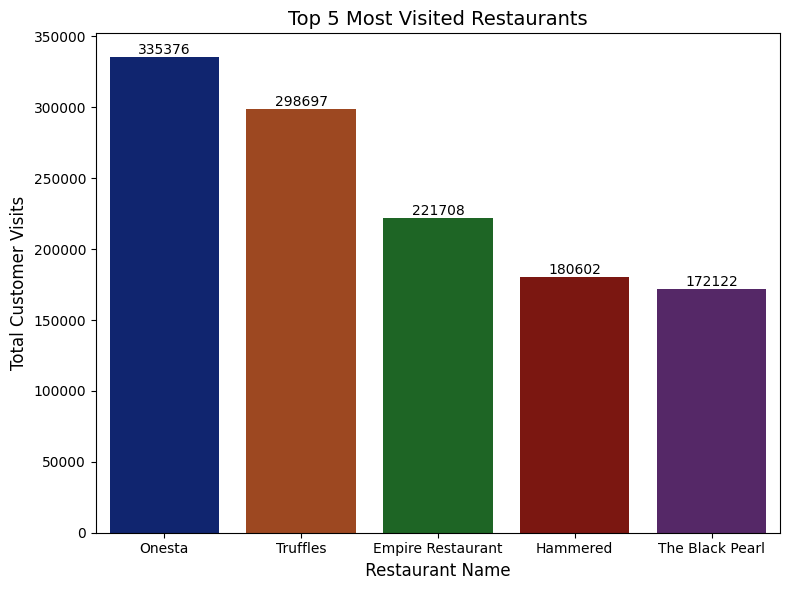

In [105]:
top_restaurants = zd.groupby('Name')['Votes'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 6))
rest=sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette='dark',hue=top_restaurants.index,legend=False)

plt.xlabel(" Restaurant Name ", fontsize=12)
plt.ylabel("Total Customer Visits", fontsize=12)
plt.title("Top 5 Most Visited Restaurants", fontsize=14)

for container in rest.containers:
    rest.bar_label(container,label_type='edge')

plt.tight_layout()
plt.show()
